<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()

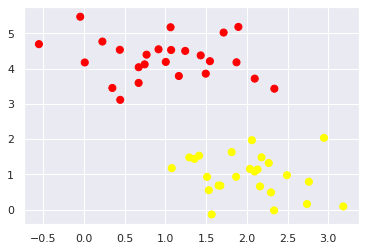

In [2]:
# 2つのクラスが明確に分かれている単純な分類を試す
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

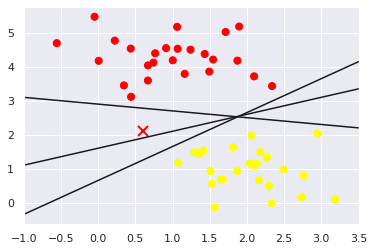

In [3]:
# 線形識別
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Xのポイントは識別境界によって分類されるクラスが異なる

(-1.0, 3.5)

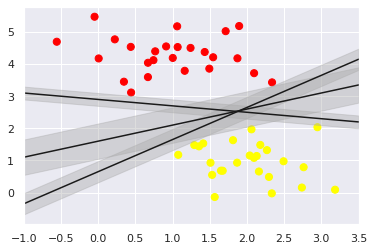

In [5]:
# 境界面のマージンを可視化
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit -d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

In [6]:
# SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  # create grid to evaluate model
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  # plot decision boundary and margins
  ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

  # plot support vector
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='black')
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

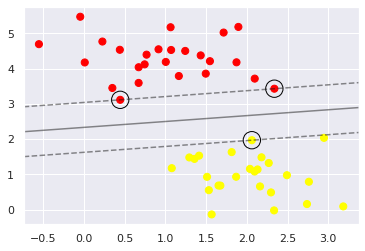

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
# サポートベクターを確認
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

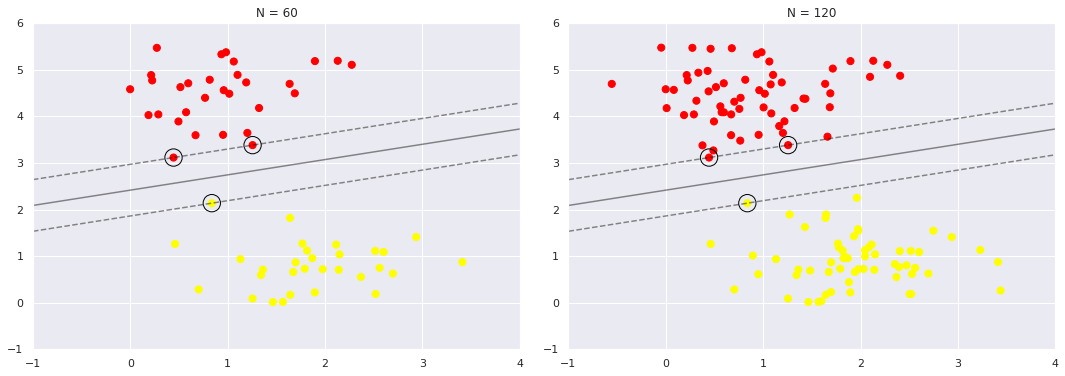

In [10]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)

  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, axi)
  axi.set_title('N = {}'.format(N))

学習データを2倍に増やしても、サポートベクターは変化しなかった

In [11]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm>

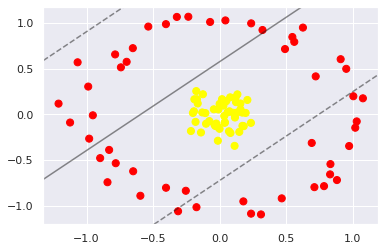

In [12]:
# 線形分類できないデータの分類
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

SVC(kernel='linear')による線形分類器では分類できない

In [17]:
# 放射基底関数によって3番目の次元を作り、線形分離できるようにする
from mpl_toolkits import mplot3d

# 放射基底関数
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')

interact(plot_3D, elev=[30, 60], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(30, 60), value=30), IntSlider(value=30, descriptio…

<function __main__.plot_3D>

こうした基底関数変換は、2点間の類似性関係(またはカーネル)に基づいているため、カーネル変換と呼ばれる

In [18]:
# 放射基底関数カーネル(radial basis function)
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

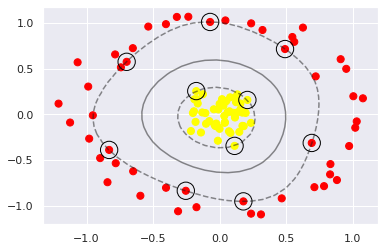

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

SVMはカーネルトリックにより、高次元に写像することなく(計算量を増やすことなく)、カーネル変換されたデータへの適合を暗黙的に行うことができる。

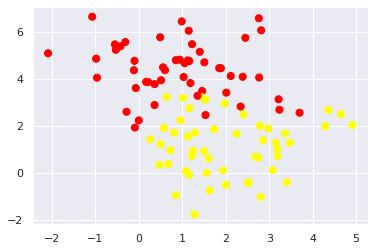

In [22]:
# ソフトマージン
# 重なりがあるデータを作成
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# ソフトマージン

- SVMに誤差を許容することにより、ポイントがマージンの中に入ることを許容する
- SVC()のパラメータCがそれにあたる
- Cが大きいほどマージンは固く、小さいほどマージンは柔らかくなる

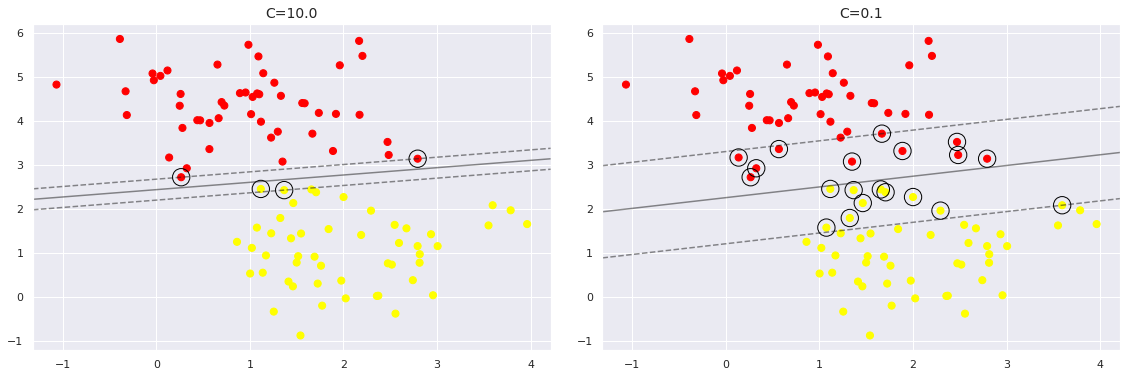

In [24]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.00625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(model, axi)
  axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
  axi.set_title('C={0:.1f}'.format(C), size=14)